# Testing phase transition

## periodic Ring lattice

### generating command lines

In [64]:
import numpy


cmd_line_seq = 'contact_process.py -l {lmbda:g} -N {N:d} -tTrans {tTrans:d} -tTotal {tTotal:d} -graph ring -X0 1 -fX0 0.0 -sim aval -outputFile {out_dir:s}/N{N:d}/corr_ring/cp_ring_N{N:d}_l{lmbda:g}_seq_aval.mat -update sequential'
cmd_line_par = 'contact_process.py -l {lmbda:g} -N {N:d} -tTrans {tTrans:d} -tTotal {tTotal:d} -graph ring -X0 1 -fX0 0.0 -sim aval -outputFile {out_dir:s}/N{N:d}/corr_ring/cp_ring_N{N:d}_l{lmbda:g}_par_aval.mat -update parallel'

N        = 100
tTrans   = 10000
tTotal   = 30000

cmd_line_filename = f'lines_to_run_CP_phasetrans_ring_N{N}.sh'
out_dir           =  'test_sim/phase_trans'

lmbda_values = numpy.linspace(0.5,4.5,100)

with open(cmd_line_filename,'w') as f:
    for l in lmbda_values:
        f.write(cmd_line_seq.format(lmbda=l,N=N,tTrans=tTrans,tTotal=tTotal,out_dir=out_dir) + '\n')
    f.write('\n')
    for l in lmbda_values:
        f.write(cmd_line_par.format(lmbda=l,N=N,tTrans=tTrans,tTotal=tTotal,out_dir=out_dir) + '\n')

### plotting phase transition

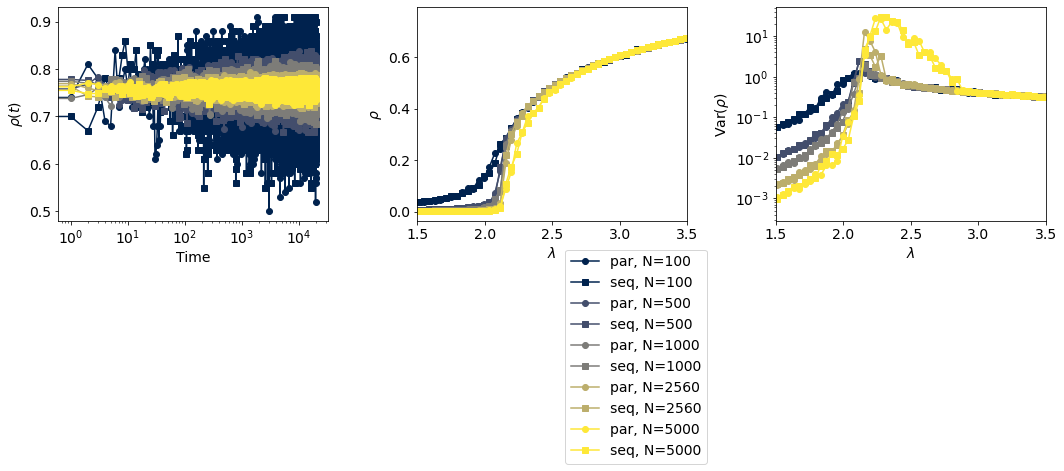

In [70]:
import os
import glob
import numpy
import matplotlib.pyplot as plt
import modules.io as io

input_dir = ['test_sim/phase_trans/N100/corr_ring',
             'test_sim/phase_trans/N500/corr_ring',
             'test_sim/phase_trans/N1000/corr_ring',
             'test_sim/phase_trans/N2560/corr_ring',
             'test_sim/phase_trans/N5000/corr_ring']

d_par = [ sorted([ io.import_mat_file(f) for f in glob.glob(os.path.join(inpd,'*_par_*.mat'))], key=lambda dd:dd.l) for inpd in input_dir ]
d_seq = [ sorted([ io.import_mat_file(f) for f in glob.glob(os.path.join(inpd,'*_seq_*.mat'))], key=lambda dd:dd.l) for inpd in input_dir ]


N_values     = numpy.array([ dd[0].N for dd in d_par ])

l_values_par = [ numpy.array([            dd.l                     for dd in dN ]) for dN in d_par ]
rho_par      = [ numpy.array([ numpy.nanmean(dd.rho)               for dd in dN ]) for dN in d_par ]
rho_var_par  = [ numpy.array([ float(dd.N) * numpy.nanvar( dd.rho) for dd in dN ]) for dN in d_par ]

l_values_seq = [ numpy.array([            dd.l                     for dd in dN ]) for dN in d_seq ]
rho_seq      = [ numpy.array([ numpy.nanmean(dd.rho)               for dd in dN ]) for dN in d_seq ]
rho_var_seq  = [ numpy.array([ float(dd.N) * numpy.nanvar( dd.rho) for dd in dN ]) for dN in d_seq ]


colors = plt.get_cmap('cividis')(numpy.linspace(0,1,N_values.size))

plt.rcParams.update({'font.size':14})
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,4))

ax[2].sharex(ax[1])

for k,N in enumerate(N_values):
    ax[0].plot(d_par[k][-1].time                ,d_par[k][-1].rho,'-o',label=f'par, N={N}',color=colors[k])
    ax[0].plot(d_seq[k][-1].time/d_seq[k][-1].dt,d_seq[k][-1].rho,'-s',label=f'seq, N={N}',color=colors[k])
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('$\\rho(t)$')
    ax[0].set_xscale('log')
    ax[1].plot(l_values_par[k],rho_par[k],'-o',label=f'par, N={N}',color=colors[k])
    ax[1].plot(l_values_seq[k],rho_seq[k],'-s',label=f'seq, N={N}',color=colors[k])
    ax[1].set_xlabel('$\\lambda$')
    ax[1].set_ylabel('$\\rho$')
    ax[2].plot(l_values_par[k],rho_var_par[k],'-o',label=f'par, N={N}',color=colors[k])
    ax[2].plot(l_values_seq[k],rho_var_seq[k],'-s',label=f'seq, N={N}',color=colors[k])
    ax[2].set_xlabel('$\\lambda$')
    ax[2].set_ylabel('Var($\\rho$)')
    ax[2].set_yscale('log')

ax[1].set_xlim((1.5,3.5))

plt.tight_layout()

ax[1].legend(bbox_to_anchor=(1.1,-0.1), loc='upper right')

plt.show()